# Analysis of Trial Data

Using annalysis.py, and previous nb, analyze the following:
1. Network weight convergence
2. Performance of PIDNN against baseline P controller (animation)
3. Mean cross-track error (XTE) for each set of test parameters for both controllers.

In [1]:
%matplotlib inline
## matplotlib notebook interacts negatively with imagemagick GIF writer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('mitch-exp')

In [2]:
import annalysis as ann

In [115]:
reload(ann)

<module 'annalysis' from 'annalysis.py'>

## Network Weight Convergence

Plot network weights for `xuesu0_out_04-28-17_00-24-43.csv` and study convergence properties.

In [4]:
t2443, t2443_meta = ann.load_data_from_fname('data/xuesu0_out_04-28-17_00-24-43.csv')
t2443.head()

,t,u,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,r,y,em_x,em_y,Unnamed: 15
0,0.0,-0.785400,1,1,1,-1,-1,-1,0.01,0.001,1,0.78540,4.1888,0.000000,0.000000,NaN
1,0.2,0.785400,1,1,1,-1,-1,-1,0.01,0.001,1,0.78579,-2.0944,-0.000750,-0.001299,NaN
2,0.4,0.032277,1,1,1,-1,-1,-1,0.01,0.001,1,0.78695,-2.0943,-0.002999,-0.005194,NaN
3,0.6,0.035814,1,1,1,-1,-1,-1,0.01,0.001,1,0.78889,-2.0941,-0.006742,-0.011680,NaN
4,0.8,0.039502,1,1,1,-1,-1,-1,0.01,0.001,1,0.79160,-2.0940,-0.011974,-0.020750,NaN


In [5]:
t2443.set_index('t')

,u,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,r,y,em_x,em_y,Unnamed: 15
t,,,,,,,,,,,,,,,
0.0,-0.785400,1,1,1,-1,-1,-1,0.010000,0.001000,1,0.785400,4.18880,0.000000,0.000000,NaN
0.2,0.785400,1,1,1,-1,-1,-1,0.010000,0.001000,1,0.785790,-2.09440,-0.000750,-0.001299,NaN
0.4,0.032277,1,1,1,-1,-1,-1,0.010000,0.001000,1,0.786950,-2.09430,-0.002999,-0.005194,NaN
0.6,0.035814,1,1,1,-1,-1,-1,0.010000,0.001000,1,0.788890,-2.09410,-0.006742,-0.011680,NaN
0.8,0.039502,1,1,1,-1,-1,-1,0.010000,0.001000,1,0.791600,-2.09400,-0.011974,-0.020750,NaN
1.0,0.042180,1,1,1,-1,-1,-1,0.010000,0.001000,1,0.795090,-2.09380,-0.018687,-0.032391,NaN
1.2,0.042982,1,1,1,-1,-1,-1,0.010000,0.001000,1,0.799340,-2.09360,-0.026870,-0.046589,NaN
1.4,0.043782,1,1,1,-1,-1,-1,0.010000,0.001000,1,0.804360,-2.09330,-0.036512,-0.063326,NaN
1.6,0.044578,1,1,1,-1,-1,-1,0.010000,0.001000,1,0.810140,-2.09310,-0.047599,-0.082581,NaN


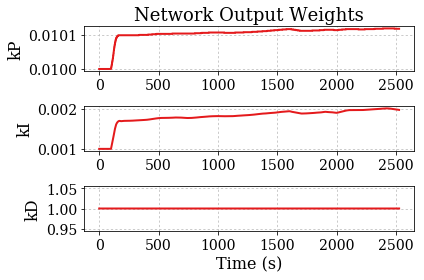

In [6]:
plt.figure(figsize=(6, 4))
# plt.subplots(3, 1, sharex=True, figsize=(6, 6))
plt.ylabel('Weight')

plt.subplot(3, 1, 1)
plt.plot(t2443['t'], t2443['wt7'])
plt.title('Network Output Weights')
plt.ylabel('kP')

plt.subplot(3, 1, 2)
plt.plot(t2443['t'], t2443['wt8'])
plt.ylabel('kI')

plt.subplot(3, 1, 3)
plt.plot(t2443['t'], t2443['wt9'])
plt.ylabel('kD')

plt.xlabel('Time (s)')

plt.tight_layout()
plt.savefig('fig/network_weights.pdf')

### XTE for this trial?

In [62]:
ann.trial_cross_track_error(t2443, t2443_meta)

5.2842303817391318

___

## Animate P vs. PIDNN

Pull trials `xuesu0_out_04-28-17_00-09-30` and `xuesu0_out_04-28-17_00-13-42` for comparison.

In [7]:
from matplotlib.animation import FuncAnimation

In [8]:
def P_trial_fix(trial):
    trial['r'] = trial['wt1']
    trial['y'] = trial['wt2']
    trial['em_x'] = trial['wt3']
    trial['em_y'] = trial['wt4']
    return trial

In [9]:
t0930_P, t0930_P_meta = ann.load_data_from_fname('data/xuesu0_out_04-28-17_00-09-30.csv')
t0930_P = P_trial_fix(t0930_P)

# Weird artifact in data
t0930_P = t0930_P.drop(range(303, len(t0930_P)))
t0930_P.tail()

,t,u,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,r,y,em_x,em_y,Unnamed: 15
298,59.6,0.15655,-1.2062,-1.4302,8.7785,-28.0406,NaN,NaN,NaN,NaN,NaN,-1.2062,-1.4302,8.7785,-28.0406,NaN
299,59.8,0.15655,-1.2062,-1.4074,8.7960,-28.1548,NaN,NaN,NaN,NaN,NaN,-1.2062,-1.4074,8.7960,-28.1548,NaN
300,60.0,0.15661,-1.2001,-1.3843,8.8161,-28.2685,NaN,NaN,NaN,NaN,NaN,-1.2001,-1.3843,8.8161,-28.2685,NaN
301,60.2,0.15661,-1.2001,-1.3609,8.8388,-28.3817,NaN,NaN,NaN,NaN,NaN,-1.2001,-1.3609,8.8388,-28.3817,NaN
302,60.4,0.15661,-1.2001,-1.3374,8.8642,-28.4943,NaN,NaN,NaN,NaN,NaN,-1.2001,-1.3374,8.8642,-28.4943,NaN


In [10]:
t1342_PIDNN, t1342_PIDNN_meta = ann.load_data_from_fname('data/xuesu0_out_04-28-17_00-13-42.csv')
t1342_PIDNN.tail()

,t,u,wt1,wt2,wt3,wt4,wt5,wt6,wt7,wt8,wt9,r,y,em_x,em_y,Unnamed: 15
290,58.0,-0.006868,1,1,1,-1,-1,-1,0.01,0.001,1,-1.0314,-1.1084,9.1039,-27.9948,NaN
291,58.2,-0.007051,1,1,1,-1,-1,-1,0.01,0.001,1,-1.0480,-1.1074,9.1555,-28.0981,NaN
292,58.4,-0.007244,1,1,1,-1,-1,-1,0.01,0.001,1,-1.0646,-1.1064,9.2072,-28.2013,NaN
293,58.6,-0.007429,1,1,1,-1,-1,-1,0.01,0.001,1,-1.0814,-1.1054,9.2589,-28.3046,NaN
294,58.8,-0.007617,1,1,1,-1,-1,-1,0.01,0.001,1,-1.0982,-1.1045,9.3108,-28.4077,NaN


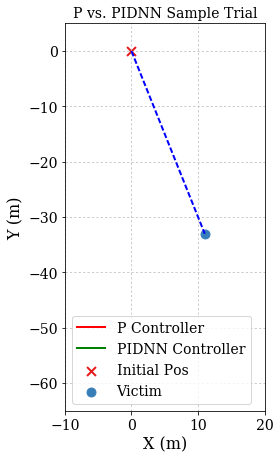

In [18]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(4, 6.5))
ax = plt.axes(xlim=(-10, 20), ylim=(-65, 5))

P_line, = ax.plot([], [], color='r', label='P Controller')
PIDNN_line, = ax.plot([], [], color='g', label='PIDNN Controller')

start = (t0930_P['em_x'][0], t0930_P['em_y'][0])
end = (float(t0930_P_meta['em2vic_x'][0]), float(t0930_P_meta['em2vic_y'][0]))
plt.scatter(*start, marker='x', s=80, label='Initial Pos')
plt.scatter(*end, marker='o', s=80, label='Victim')
plt.plot(*zip(start, end), linestyle='--', color='b')

plt.title('P vs. PIDNN Sample Trial', fontsize=14)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.legend(loc=3, fontsize=14)
plt.tight_layout()

trials = [t0930_P, t1342_PIDNN]
lines = [P_line, PIDNN_line]

# initialization function: plot the background of each frame
def init():
    for ln in lines:
        ln.set_data([], [])
    return lines

# animation function.  This is called sequentially
def animate(i):
    # plt.axis('equal')
    for tr, ln in zip(trials, lines):
        if len(tr) < i:
            isat = len(tr)
        else:
            isat = i

        ln.set_data(tr['em_x'].values[:isat], tr['em_y'].values[:isat])
    return lines

len_anim = max((len(t0930_P), len(t1342_PIDNN)))

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init,
                     frames=np.arange(0, (len_anim + 100) / 2) * 2, interval=20, blit=True)

In [19]:
# save the animation as a GIF
anim.save('fig/p_v_pidnn.gif', dpi=80, writer='imagemagick')
# anim.save('fig/p_v_pidnn.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

## View All Trials

Inspect all trials

## XTE for all trials

Grab list of files and compute cross track error.

In [11]:
import os

In [45]:
files = os.listdir('./data')
fnames = [fname for fname in files if 'out' in fname]
fnames[:5]

['PIDtrial10_out_04-28-17_03-32-45.csv',
 'PIDtrial11_out_04-28-17_03-34-29.csv',
 'PIDtrial12_out_04-28-17_05-05-55.csv',
 'PIDtrial13_out_04-28-17_06-38-58.csv',
 'PIDtrial14_out_04-28-17_07-12-26.csv']

In [46]:
fnames_short = [f.split('_')[0] for f in fnames]
fnames_short[:5]

['PIDtrial10', 'PIDtrial11', 'PIDtrial12', 'PIDtrial13', 'PIDtrial14']

In [47]:
fpaths = ['data/' + fname for fname in fnames]
fpaths

['data/PIDtrial10_out_04-28-17_03-32-45.csv',
 'data/PIDtrial11_out_04-28-17_03-34-29.csv',
 'data/PIDtrial12_out_04-28-17_05-05-55.csv',
 'data/PIDtrial13_out_04-28-17_06-38-58.csv',
 'data/PIDtrial14_out_04-28-17_07-12-26.csv',
 'data/PIDtrial16_out_04-28-17_08-28-40.csv',
 'data/PIDtrial17_out_04-28-17_08-33-31.csv',
 'data/PIDtrial1_out_04-28-17_01-15-19.csv',
 'data/PIDtrial23_out_04-28-17_08-53-34.csv',
 'data/PIDtrial24_out_04-28-17_08-59-34.csv',
 'data/PIDtrial2_out_04-28-17_01-19-31.csv',
 'data/PIDtrial3_out_04-28-17_01-23-32.csv',
 'data/PIDtrial4_out_04-28-17_01-29-29.csv',
 'data/PIDtrial5_out_04-28-17_01-33-42.csv',
 'data/PIDtrial6_out_04-28-17_01-34-26.csv',
 'data/PIDtrial7_out_04-28-17_02-16-29.csv',
 'data/PIDtrial8_out_04-28-17_02-20-19.csv',
 'data/PIDtrial9_out_04-28-17_02-55-21.csv',
 'data/Ptrial10_out_04-28-17_03-32-45.csv',
 'data/Ptrial11_out_04-28-17_03-34-29.csv',
 'data/Ptrial12_out_04-28-17_05-05-55.csv',
 'data/Ptrial13_out_04-28-17_06-38-58.csv',
 'dat

In [48]:
fpaths[29:]

['data/Ptrial3_out_04-28-17_01-23-32.csv',
 'data/Ptrial4_out_04-28-17_01-29-29.csv',
 'data/Ptrial5_out_04-28-17_01-33-42.csv',
 'data/Ptrial6_out_04-28-17_01-34-26.csv',
 'data/Ptrial7_out_04-28-17_02-16-29.csv',
 'data/Ptrial8_out_04-28-17_02-20-19.csv',
 'data/Ptrial9_out_04-28-17_02-55-21.csv',
 'data/xuesu0_out_04-28-17_00-09-30.csv',
 'data/xuesu0_out_04-28-17_00-13-42.csv',
 'data/xuesu0_out_04-28-17_00-24-43.csv']

In [91]:
def straight_cte(p_ev, p_ev_i):
    return np.abs(np.cross(p_ev, p_ev_i)) / np.linalg.norm(p_ev_i)

In [106]:
def straight_mean_cte(trial, trial_meta):
    ''' Mean cross-track error for straight paths
        NOTE: will not work if emily is not starting at (0, 0)
    '''
    p_v = trial_meta[['em2vic_x', 'em2vic_y']].values[0].astype('float64')
    p_e = trial[['em_x', 'em_y']].values
    p_ev = p_v - p_e
#     cte = np.vectorize(straight_cte, excluded=('p_ev_i'))(p_ev, p_v)
    cte = straight_cte(p_ev, p_v)
    return np.mean(cte)

In [112]:
t2332, t2332_meta = ann.load_data_from_fname('data/PIDtrial13_out_04-28-17_06-38-58.csv')

In [130]:
t2332_meta['em2vic_y'].values[-1]

'1'

In [118]:
'hey' + 'this' + '%.2f' % 0.348764 + 'is'

'heythis0.35is'

In [113]:
straight_mean_cte(t2332, t2332_meta)

8.4232429397057818

In [121]:
4 if False else 5

5

In [123]:
a = np.zeros((30, 3))
a[:,0] = np.arange(0, 30)
a

array([[  0.,   0.,   0.],
       [  1.,   0.,   0.],
       [  2.,   0.,   0.],
       [  3.,   0.,   0.],
       [  4.,   0.,   0.],
       [  5.,   0.,   0.],
       [  6.,   0.,   0.],
       [  7.,   0.,   0.],
       [  8.,   0.,   0.],
       [  9.,   0.,   0.],
       [ 10.,   0.,   0.],
       [ 11.,   0.,   0.],
       [ 12.,   0.,   0.],
       [ 13.,   0.,   0.],
       [ 14.,   0.,   0.],
       [ 15.,   0.,   0.],
       [ 16.,   0.,   0.],
       [ 17.,   0.,   0.],
       [ 18.,   0.,   0.],
       [ 19.,   0.,   0.],
       [ 20.,   0.,   0.],
       [ 21.,   0.,   0.],
       [ 22.,   0.,   0.],
       [ 23.,   0.,   0.],
       [ 24.,   0.,   0.],
       [ 25.,   0.,   0.],
       [ 26.,   0.,   0.],
       [ 27.,   0.,   0.],
       [ 28.,   0.,   0.],
       [ 29.,   0.,   0.]])

In [132]:
# with open('cross_track_errors.csv', 'wb') as savefile:
#     savefile.write('Filename,Mean Cross Track Error\n')
ctes = np.zeros((30, 3))
ctes[:, 0] = np.arange(0, 30)

for fp, fs in zip(fpaths, fnames_short):
    try:
        controller, num = fs.split('trial')
        num = int(num)
        ctype = 1 if (controller == 'PID') else 2

        tr, trm = ann.load_data_from_fname(fp)
        tr = ann.trim_time(tr)
        
        if (trm['em2vic_y'].values[-1] == '4'):
            mcte = straight_mean_cte(tr, trm)
            ctes[num, ctype] = mcte
        else:
            raise TypeError

        print('MCTE for %s: %.3f' % (fs, mcte))
    except:
        print('Skipping %s' % fs)
    finally:
        pass

np.savetxt('cross_track_errors.csv', ctes, fmt=['%i', '%f', '%f'],
           delimiter=',', header='Trial Number,PIDNN, P\n')

MCTE for PIDtrial10: 1.607
MCTE for PIDtrial11: 112.923
MCTE for PIDtrial12: 1.581
Skipping PIDtrial13
Skipping PIDtrial14
MCTE for PIDtrial16: 5.350
MCTE for PIDtrial17: 4.086
MCTE for PIDtrial1: 1.730
MCTE for PIDtrial23: 4.338
MCTE for PIDtrial24: 10.507
MCTE for PIDtrial2: 2.536
MCTE for PIDtrial3: 1.711
MCTE for PIDtrial4: 1.730
MCTE for PIDtrial5: 3.989
MCTE for PIDtrial6: 1.490
MCTE for PIDtrial7: 1.730
MCTE for PIDtrial8: 2.842
MCTE for PIDtrial9: 1.507
MCTE for Ptrial10: 0.128
MCTE for Ptrial11: 108.309
MCTE for Ptrial12: 1.942
Skipping Ptrial13
Skipping Ptrial14
MCTE for Ptrial16: 0.217
MCTE for Ptrial17: 17.961
MCTE for Ptrial1: 0.235
MCTE for Ptrial23: 0.244
MCTE for Ptrial24: 0.249
MCTE for Ptrial2: 0.286
MCTE for Ptrial3: 0.138
MCTE for Ptrial4: 0.235
MCTE for Ptrial5: 0.130
MCTE for Ptrial6: 1.871
MCTE for Ptrial7: 0.235
MCTE for Ptrial8: 756.406
MCTE for Ptrial9: 1.946
Skipping xuesu0
Skipping xuesu0
Skipping xuesu0


## Plot all trials

Plot all trials and save to fig folder.

In [59]:
for i, f in enumerate(fpaths):
    plt.figure()
    tr, trm = ann.load_data_from_fname(f)
    tr = ann.trim_time(tr)
    ann.view_trial(tr, trm)
    plt.title(fnames[i].split('_')[0])
    plt.savefig('fig/' + fnames[i].split('.')[0] + '.pdf')
    plt.close()

___

In [145]:
from collections import deque

In [146]:
a = np.arange(0, 10)
b = range(10)
c = deque(range(10))

In [147]:
%%timeit
sum(c)

The slowest run took 8.26 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 981 ns per loop
